# Building Footprint Extraction for the USA

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/examples/building_footprints_usa.ipynb)

## Install package
To use the `geoai-py` package, ensure it is installed in your environment. Uncomment the command below if needed.

In [1]:
%pip install geoai-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 6.0 MB/s eta 0:00:00
   ━

## Import libraries

In [1]:
import geoai

## Download sample data

In [2]:
raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train.tif"
)
vector_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train_buildings.geojson"

In [3]:
raster_path = geoai.download_file(raster_url)

naip_train.tif: 100%|██████████| 12.1M/12.1M [00:00<00:00, 93.1MB/s]


In [4]:
vector_path = geoai.download_file(vector_url)

naip_train_buildings.geojson: 100%|██████████| 456k/456k [00:00<00:00, 1.03MB/s]


## Initialize building footprint extraction pretrained model

The pretained model is adapted from the Esri [building footprint extraction](https://www.arcgis.com/home/item.html?id=a6857359a1cd44839781a4f113cd5934) model for the USA. Credits to Esri for the model.

In [5]:
extractor = geoai.BuildingFootprintExtractor()

Model path not specified, downloading from Hugging Face...


building_footprints_usa.pth:   0%|          | 0.00/176M [00:00<?, ?B/s]

Model downloaded to: /root/.cache/huggingface/hub/models--giswqs--geoai/snapshots/f9c3c385b3848cff79f130ae823aeeba0fa8457f/building_footprints_usa.pth
Model loaded successfully


## Extract building footprints

### Option 1: Extract building footprints as raster

In [6]:
mask_path = extractor.save_masks_as_geotiff(
    raster_path=raster_path,
    output_path="building_masks.tif",
    confidence_threshold=0.5,
    mask_threshold=0.5,
)

Processing masks with parameters:
- Confidence threshold: 0.5
- Chip size: (512, 512)
- Mask threshold: 0.5
Dataset initialized with 3 rows and 5 columns of chips
Image dimensions: 2503 x 1126 pixels
Chip size: 512 x 512 pixels
CRS: EPSG:26911
Processing raster with 4 batches


 25%|██▌       | 1/4 [00:02<00:07,  2.38s/it]

Resizing masks at image edges (set verbose=True for details)


100%|██████████| 4/4 [00:05<00:00,  1.36s/it]

Object masks saved to building_masks.tif


Convert raster to vector

In [7]:
gdf = extractor.masks_to_vector(
    mask_path=mask_path,
    output_path="building_masks.geojson",
    simplify_tolerance=1.0,
)

Converting mask to GeoJSON with parameters:
- Mask threshold: 0.5
- Min object area: 100
- Max object area: None
- Simplify tolerance: 1.0
- NMS IoU threshold: 0.5
- Regularize objects: True
- Angle threshold: 15° from 90°
- Rectangularity threshold: 70.0%
Mask dimensions: (1126, 2503)
Mask value range: 0 to 255
Found 642 potential objects


100%|██████████| 642/642 [00:01<00:00, 463.62it/s]


Created 623 valid polygons
Object count after NMS filtering: 623
Regularizing 623 objects...
- Angle threshold: 15° from 90°
- Min orthogonality: 30.0% of angles
- Min rectangularity: 70.0% of bounding box area


100%|██████████| 623/623 [00:00<00:00, 989.88it/s] 


Regularization completed:
- Total objects: 623
- Rectangular objects: 619 (99.4%)
- Other regularized objects: 0 (0.0%)
- Unmodified objects: 4 (0.6%)
Saved 623 objects to building_masks.geojson


### Option 2: Extract building footprints as vector

In [8]:
output_path = "naip_buildings.geojson"
gdf = extractor.process_raster(
    raster_path,
    output_path="buildings.geojson",
    batch_size=4,
    confidence_threshold=0.5,
    overlap=0.25,
    nms_iou_threshold=0.5,
    min_object_area=100,
    max_object_area=None,
    mask_threshold=0.5,
    simplify_tolerance=1.0,
)

Processing with parameters:
- Confidence threshold: 0.5
- Tile overlap: 0.25
- Chip size: (512, 512)
- NMS IoU threshold: 0.5
- Mask threshold: 0.5
- Min object area: 100
- Max object area: None
- Simplify tolerance: 1.0
- Filter edge objects: True
- Edge buffer size: 20 pixels
Dataset initialized with 3 rows and 5 columns of chips
Image dimensions: 2503 x 1126 pixels
Chip size: 512 x 512 pixels
CRS: EPSG:26911
Processing raster with 4 batches


100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


Objects before filtering: 684
Objects after filtering: 679
Saved 679 objects to buildings.geojson


## Regularize building footprints

In [9]:
gdf_regularized = extractor.regularize_buildings(
    gdf=gdf,
    min_area=100,
    angle_threshold=15,
    orthogonality_threshold=0.3,
    rectangularity_threshold=0.7,
)

Regularizing 679 objects...
- Angle threshold: 15° from 90°
- Min orthogonality: 30.0% of angles
- Min rectangularity: 70.0% of bounding box area


100%|██████████| 679/679 [00:00<00:00, 1073.55it/s]

Regularization completed:
- Total objects: 679
- Rectangular objects: 648 (95.4%)
- Other regularized objects: 0 (0.0%)
- Unmodified objects: 31 (4.6%)


## Visualize building footprints

In [10]:
gdf.head()

geometry  confidence  class
624  POLYGON ((455181.6 5277618.6, 455177.4 5277614...    0.994213      1
616  POLYGON ((454990.2 5277628.2, 454990.2 5277627...    0.992599      1
617  POLYGON ((454855.8 5277628.2, 454855.8 5277626...    0.989381      1
278  POLYGON ((454981.8 5277798, 454981.2 5277797.4...    0.986561      1
279  POLYGON ((455052 5277904.8, 455050.8 5277903.6...    0.982763      1

In [11]:
geoai.view_vector_interactive(
    gdf, column="confidence", layer_name="Building", tiles="Satellite"
)

In [12]:
geoai.view_vector_interactive(
    gdf, column="confidence", layer_name="Building", tiles=raster_url
)

In [13]:
geoai.view_vector_interactive(
    gdf_regularized, column="confidence", layer_name="Building", tiles=raster_url
)

Using confidence values (range: 0.50 - 0.99)
Visualization saved to naip_buildings.png
Sample visualization saved to naip_buildings_sample.png


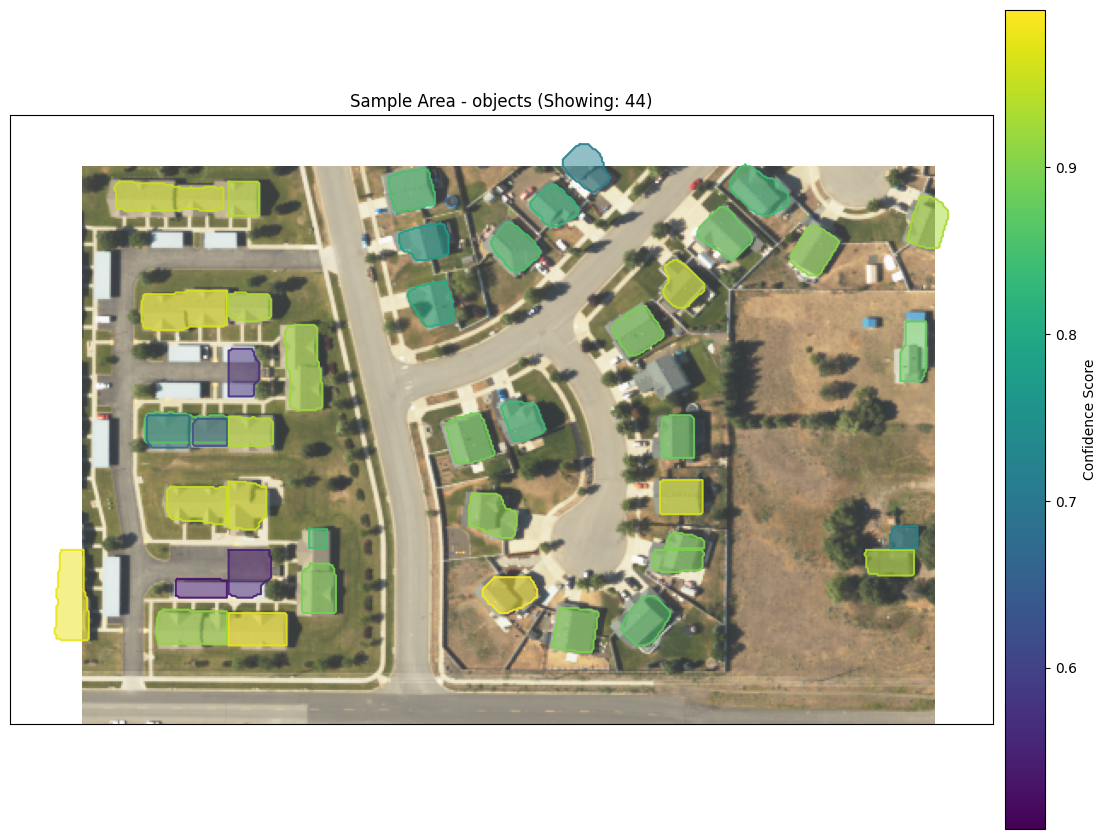

In [14]:
extractor.visualize_results(raster_path, gdf, output_path="naip_buildings.png")

Using confidence values (range: 0.50 - 0.99)
Visualization saved to naip_buildings_regularized.png
Sample visualization saved to naip_buildings_regularized_sample.png


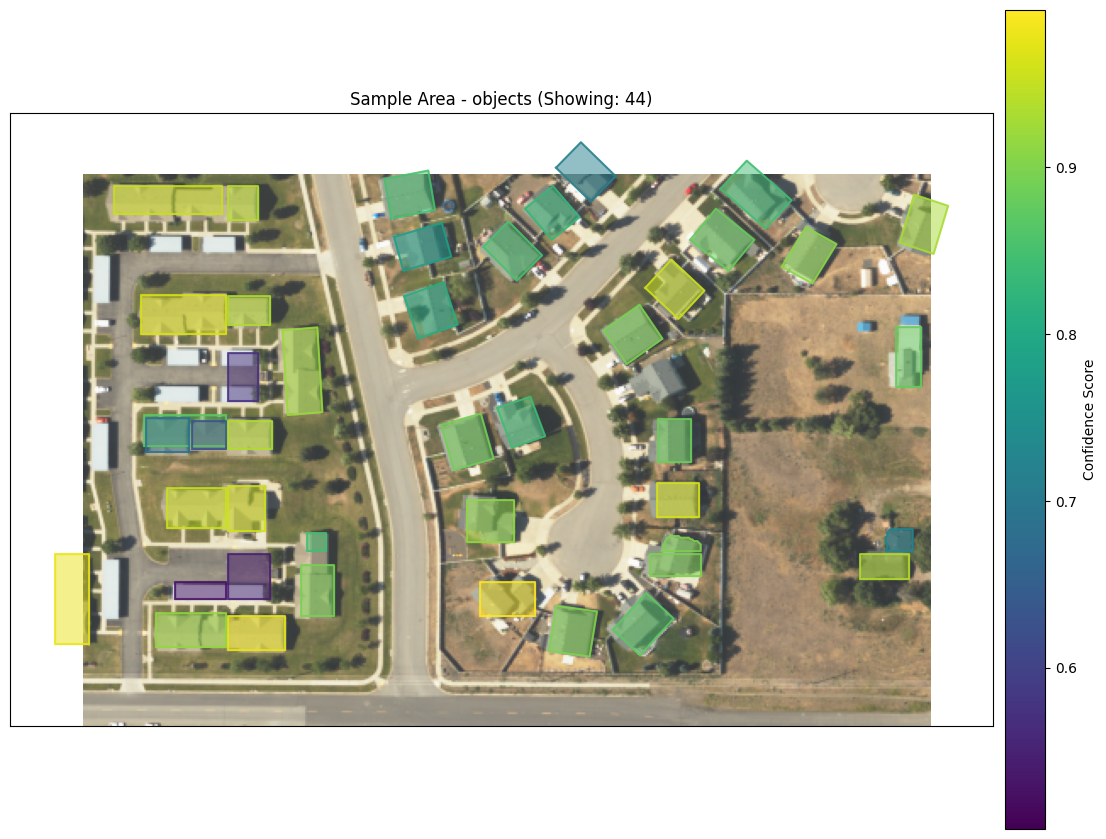

In [15]:
extractor.visualize_results(
    raster_path, gdf_regularized, output_path="naip_buildings_regularized.png"
)